In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import time
import math
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# CLEANING DATA FROM MERGED DATASETS


# LOADING MERGE_DF

In [63]:
import pandas as pd
merge_df = pd.read_csv('../raw_data/cleaned_merge_df.csv')
merge_df.head()

/var/tmp/ipykernel_8740/3012002382.py:2: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  merge_df = pd.read_csv('../raw_data/cleaned_merge_df.csv')


,date,id,item_id,dept_id,cat_id,store_id,state_id,sales,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


In [64]:
merge_df

,date,id,item_id,dept_id,cat_id,store_id,state_id,sales,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170917,2016-04-24,FOODS_1_131_CA_2_validation,FOODS_1_131,FOODS_1,FOODS,CA_2,CA,0.0,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0,0,0,NaN
9170918,2016-04-24,FOODS_1_132_CA_2_validation,FOODS_1_132,FOODS_1,FOODS,CA_2,CA,1.0,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0,0,0,NaN
9170919,2016-04-24,FOODS_1_133_CA_2_validation,FOODS_1_133,FOODS_1,FOODS,CA_2,CA,1.0,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0,0,0,NaN
9170920,2016-04-24,FOODS_1_134_CA_2_validation,FOODS_1_134,FOODS_1,FOODS,CA_2,CA,0.0,Sunday,2,4,2016,NaN,NaN,NaN,NaN,0,0,0,NaN


# DETECT MISSING VALUES 


In [65]:
missing_values = merge_df.isnull().sum()
print(missing_values)

date                  0
id                    0
item_id               0
dept_id               0
cat_id                0
store_id              0
state_id              0
sales               596
weekday               0
wday                  0
month                 0
year                  0
event_name_1    8432646
event_type_1    8432646
event_name_2    9151746
event_type_2    9151746
snap_CA               0
snap_TX               0
snap_WI               0
sell_price      4921203
dtype: int64


In [66]:
#FILLING THE EMPTY PLACES
#filling missing sales with 0 for now
merge_df['sales'].fillna(0, inplace=True)
merge_df['sell_price'].fillna(0, inplace=True)
merge_df['event_name_1'].fillna('missing', inplace=True)
merge_df['event_type_1'].fillna('missing', inplace=True)
merge_df['event_name_2'].fillna('missing', inplace=True)
merge_df['event_type_2'].fillna('missing', inplace=True)


In [67]:
#CHECKING MISSING VALUES AGAIN
missing_values = merge_df.isnull().sum()
print(missing_values)

date            0
id              0
item_id         0
dept_id         0
cat_id          0
store_id        0
state_id        0
sales           0
weekday         0
wday            0
month           0
year            0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
sell_price      0
dtype: int64


### CHECKING DUPLICATED ROWS 

In [68]:

duplicated_rows = merge_df[merge_df.duplicated()]

print("Duplicated rows:")
print(duplicated_rows)


Duplicated rows:
Empty DataFrame
Columns: [date, id, item_id, dept_id, cat_id, store_id, state_id, sales, weekday, wday, month, year, event_name_1, event_type_1, event_name_2, event_type_2, snap_CA, snap_TX, snap_WI, sell_price]
Index: []


In [69]:
#NO DUPLICATED ROWS

# MISSING DATES

In [70]:

star_date = '2011-01-29'
end_date = '2016-06-19'

# Generate the dates
expected_dates = pd.date_range(start=star_date, end=end_date)

# format
merge_df['date'] = pd.to_datetime(merge_df['date'])

# extract unique dates
current_dates = merge_df['date'].dt.date.unique()

expected_dates_set = set(expected_dates)
current_dates_set = set(current_dates)

# verify
missing_dates = expected_dates_set - current_dates_set


## FILLING THE MISSING DATES

In [71]:
import pandas as pd

# Convert the date column to datetime format, if necessary
merge_df['date'] = pd.to_datetime(merge_df['date'])

# Define the date range from January 29, 2011 to April 24, 2016
start_date = '2011-01-29'
end_date = '2016-04-24'

# Generate all dates within the range
expected_dates = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame with all expected dates
expected_dates_df = pd.DataFrame({'date': expected_dates})

# Merge the expected dates DataFrame with the existing DataFrame
merge_df = pd.merge(expected_dates_df, merge_df, on='date', how='left')

# Check if there are any missing dates in the range
if merge_df['date'].isnull().any():
    print("There are still missing dates in the specified range.")
else:
    print("All missing dates have been filled correctly.")


All missing dates have been filled correctly.


In [72]:
merge_df.head(5)

,date,id,item_id,dept_id,cat_id,store_id,state_id,sales,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
1,2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
2,2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
3,2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
4,2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0


### SET AS INDEX 

In [73]:
# Convert the date column to datetime format, if necessary
merge_df['date'] = pd.to_datetime(merge_df['date'])

# Set the 'date' column as the DataFrame index without renaming it to 'index'
merge_df.set_index('date', inplace=True, drop=True)

# Check the index name
print("Index name:", merge_df.index.name)

Index name: date


In [74]:
merge_df.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,sales,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0


In [75]:
#dropping month and year because repetitive
# merge_df.drop(columns=['year','month'], inplace=True)


In [76]:
merge_df.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,sales,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,2011,missing,missing,missing,missing,0,0,0,0.0


## testing product

In [77]:
test_product = merge_df[merge_df['item_id']=='HOBBIES_1_272'].groupby('date').sum()

<Axes: xlabel='date', ylabel='sales'>

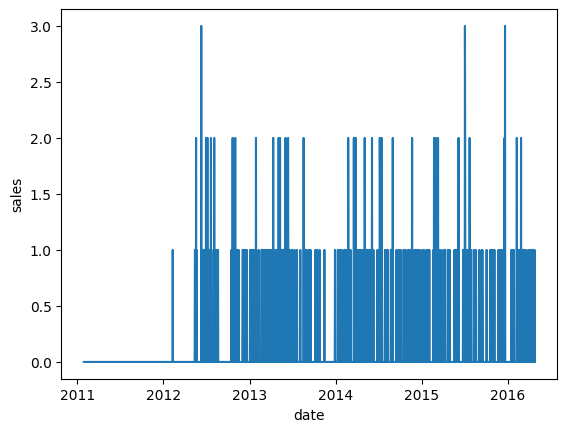

In [78]:
sns.lineplot(test_product['sales'])

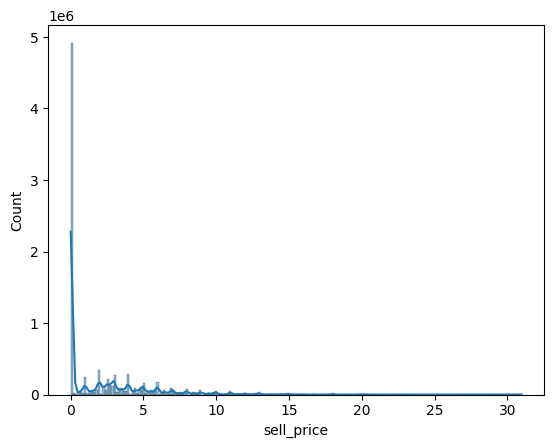

In [79]:
sns.histplot(merge_df['sell_price'], bins=200,kde = True);

# MinMax Scaler & OneHotEncoder

In [80]:
# Scale 'sell_price' and 'year' by using MinMaxScaler
minmax_scaler = MinMaxScaler()

merge_df[['sell_price']] = minmax_scaler.fit_transform(merge_df[['sell_price']])
merge_df[['year']] = minmax_scaler.fit_transform(merge_df[['year']])

In [81]:
merge_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,sales,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0


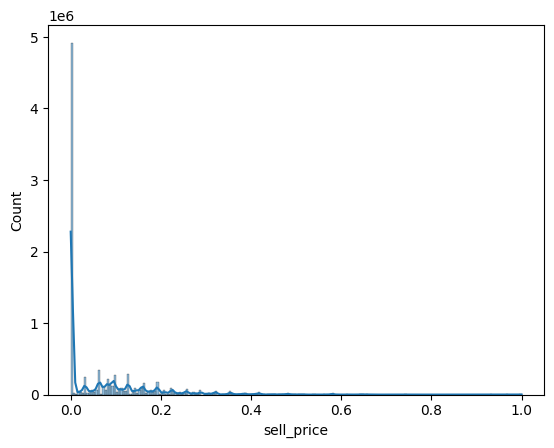

In [82]:
sns.histplot(merge_df['sell_price'], bins=200,kde = True);

In [83]:
merge_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,sales,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
date,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0.0,Saturday,1,1,0.0,missing,missing,missing,missing,0,0,0,0.0


In [84]:
# Check unique values
print(f"The unique values for 'cat_id' are {merge_df['cat_id'].unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(merge_df[['cat_id']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['cat_id']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['cat_id'], inplace = True)

The unique values for 'cat_id' are ['HOBBIES' 'HOUSEHOLD' 'FOODS']
The categories detected by the OneHotEncoder are [array(['FOODS', 'HOBBIES', 'HOUSEHOLD'], dtype=object)]
The column names for the encoded values are ['cat_id_FOODS' 'cat_id_HOBBIES' 'cat_id_HOUSEHOLD']


In [85]:
merge_df.head()

,id,item_id,dept_id,store_id,state_id,sales,weekday,wday,month,year,...,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,cat_id_FOODS,cat_id_HOBBIES,cat_id_HOUSEHOLD
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,missing,missing,missing,0,0,0,0.0,0.0,1.0,0.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,missing,missing,missing,0,0,0,0.0,0.0,1.0,0.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,missing,missing,missing,0,0,0,0.0,0.0,1.0,0.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,missing,missing,missing,0,0,0,0.0,0.0,1.0,0.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,missing,missing,missing,0,0,0,0.0,0.0,1.0,0.0


In [86]:
# Check unique values
print(f"The unique values for 'event_type_1' are {merge_df['event_type_1'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_type_1']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_type_1']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_type_1'], inplace = True)

The unique values for 'event_type_1' are ['missing' 'Sporting' 'Cultural' 'National' 'Religious']
The categories detected by the OneHotEncoder are [array(['Cultural', 'National', 'Religious', 'Sporting', 'missing'],
      dtype=object)]
The column names for the encoded values are ['event_type_1_Cultural' 'event_type_1_National' 'event_type_1_Religious'
 'event_type_1_Sporting' 'event_type_1_missing']


In [87]:
# Check unique values
print(f"The unique values for 'event_type_2' are {merge_df['event_type_2'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_type_2']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_type_2']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_type_2'], inplace = True)

The unique values for 'event_type_2' are ['missing' 'Cultural' 'Religious']
The categories detected by the OneHotEncoder are [array(['Cultural', 'Religious', 'missing'], dtype=object)]
The column names for the encoded values are ['event_type_2_Cultural' 'event_type_2_Religious' 'event_type_2_missing']


In [88]:
# Check unique values
print(f"The unique values for 'event_name_1' are {merge_df['event_name_1'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_name_1']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_name_1']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_name_1'], inplace = True)

The unique values for 'event_name_1' are ['missing' 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart'
 'LentWeek2' 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End'
 'Cinco De Mayo' "Mother's day" 'MemorialDay' 'NBAFinalsStart'
 'NBAFinalsEnd' "Father's day" 'IndependenceDay' 'Ramadan starts'
 'Eid al-Fitr' 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha'
 'VeteransDay' 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear'
 'OrthodoxChristmas' 'MartinLutherKingDay' 'Easter']
The categories detected by the OneHotEncoder are [array(['Chanukah End', 'Christmas', 'Cinco De Mayo', 'ColumbusDay',
       'Easter', 'Eid al-Fitr', 'EidAlAdha', "Father's day", 'Halloween',
       'IndependenceDay', 'LaborDay', 'LentStart', 'LentWeek2',
       'MartinLutherKingDay', 'MemorialDay', "Mother's day",
       'NBAFinalsEnd', 'NBAFinalsStart', 'NewYear', 'OrthodoxChristmas',
       'OrthodoxEaster', 'Pesach End', 'PresidentsDay', 'Purim End',
       'Ramadan starts', 'StPatricksDay', 'SuperB

In [89]:
# Check unique values
print(f"The unique values for 'event_name_2' are {merge_df['event_name_2'].unique()}")

# Fit encoder
ohe.fit(merge_df[['event_name_2']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "cat_id" column
merge_df[ohe.get_feature_names_out()] = ohe.transform(merge_df[['event_name_2']])

# Drop the column "cat_id" which has been encoded
merge_df.drop(columns = ['event_name_2'], inplace = True)

The unique values for 'event_name_2' are ['missing' 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]
The categories detected by the OneHotEncoder are [array(['Cinco De Mayo', 'Easter', "Father's day", 'OrthodoxEaster',
       'missing'], dtype=object)]
The column names for the encoded values are ['event_name_2_Cinco De Mayo' 'event_name_2_Easter'
 "event_name_2_Father's day" 'event_name_2_OrthodoxEaster'
 'event_name_2_missing']


In [90]:
merge_df.head()


,id,item_id,dept_id,store_id,state_id,sales,weekday,wday,month,year,...,event_name_1_SuperBowl,event_name_1_Thanksgiving,event_name_1_ValentinesDay,event_name_1_VeteransDay,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [91]:
merge_df['wday'].value_counts()

wday
1    1313556
2    1313556
3    1308762
4    1308762
5    1308762
6    1308762
7    1308762
Name: count, dtype: int64

In [92]:
merge_df['weekday'].value_counts()

weekday
Saturday     1313556
Sunday       1313556
Monday       1308762
Tuesday      1308762
Wednesday    1308762
Thursday     1308762
Friday       1308762
Name: count, dtype: int64

In [93]:
#Encoding Cyclical Features for weekdays
# Notice that Sat starts as 1 till Fri as 7 for 'wday'
merge_df['wday_sin'] = np.sin(2 * np.pi * merge_df['wday'] /7.0)
merge_df['wday_cos'] = np.cos(2 * np.pi * merge_df['wday'] /7.0)

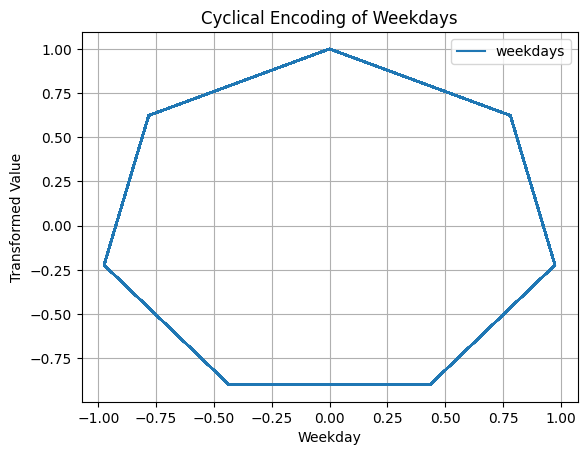

In [94]:
#plt.figure(figsize=(10, 5))
plt.plot(merge_df['wday_sin'], merge_df['wday_cos'], label='weekdays')
plt.title('Cyclical Encoding of Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Transformed Value')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
#Encoding Cyclical Features for month

merge_df['month_sin'] = np.sin(2 * np.pi * merge_df['month'] /12.0)
merge_df['month_cos'] = np.cos(2 * np.pi * merge_df['month'] /12.0)

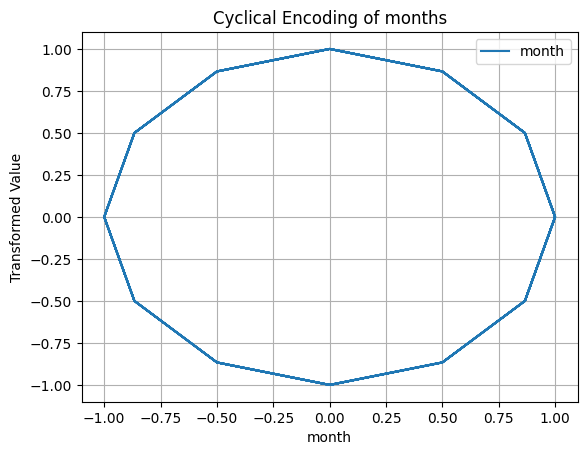

In [96]:
#plt.figure(figsize=(10, 5))
plt.plot(merge_df['month_sin'], merge_df['month_cos'], label='month')
plt.title('Cyclical Encoding of months')
plt.xlabel('month')
plt.ylabel('Transformed Value')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
merge_df.head()

,id,item_id,dept_id,store_id,state_id,sales,weekday,wday,month,year,...,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing,wday_sin,wday_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,CA_1,CA,0.0,Saturday,1,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.62349,0.5,0.866025


In [98]:
merge_df_scaled = merge_df.drop(columns=['weekday'])

In [99]:
merge_df_scaled

,id,item_id,dept_id,store_id,state_id,sales,wday,month,year,snap_CA,...,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing,wday_sin,wday_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-24,FOODS_1_131_CA_2_validation,FOODS_1_131,FOODS_1,CA_2,CA,0.0,2,4,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000
2016-04-24,FOODS_1_132_CA_2_validation,FOODS_1_132,FOODS_1,CA_2,CA,1.0,2,4,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000
2016-04-24,FOODS_1_133_CA_2_validation,FOODS_1_133,FOODS_1,CA_2,CA,1.0,2,4,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000


In [100]:
#merge_df_scaled.to_csv('../raw_data/scaled_cleaned_merge_df.csv', index=True)

In [101]:
filtered_df = merge_df_scaled[(merge_df_scaled["sales"] > 0) & (merge_df_scaled["sell_price"] == 0)]

In [102]:
filtered_df[["sales","sell_price","id","item_id","store_id"]]

,sales,sell_price,id,item_id,store_id
date,,,,,
2011-01-29,4.0,0.0,FOODS_3_533_CA_1_validation,FOODS_3_533,CA_1
2011-01-29,7.0,0.0,FOODS_3_534_CA_1_validation,FOODS_3_534,CA_1
2011-01-29,2.0,0.0,FOODS_3_535_CA_1_validation,FOODS_3_535,CA_1
2011-01-29,3.0,0.0,FOODS_3_536_CA_1_validation,FOODS_3_536,CA_1
2011-01-29,27.0,0.0,FOODS_3_541_CA_1_validation,FOODS_3_541,CA_1
...,...,...,...,...,...
2016-04-24,5.0,0.0,FOODS_1_128_CA_2_validation,FOODS_1_128,CA_2
2016-04-24,1.0,0.0,FOODS_1_129_CA_2_validation,FOODS_1_129,CA_2
2016-04-24,2.0,0.0,FOODS_1_130_CA_2_validation,FOODS_1_130,CA_2


In [103]:
merge_df_scaled

,id,item_id,dept_id,store_id,state_id,sales,wday,month,year,snap_CA,...,event_name_1_missing,event_name_2_Cinco De Mayo,event_name_2_Easter,event_name_2_Father's day,event_name_2_OrthodoxEaster,event_name_2_missing,wday_sin,wday_cos,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
2011-01-29,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,CA_1,CA,0.0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.781831,0.623490,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-24,FOODS_1_131_CA_2_validation,FOODS_1_131,FOODS_1,CA_2,CA,0.0,2,4,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000
2016-04-24,FOODS_1_132_CA_2_validation,FOODS_1_132,FOODS_1,CA_2,CA,1.0,2,4,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000
2016-04-24,FOODS_1_133_CA_2_validation,FOODS_1_133,FOODS_1,CA_2,CA,1.0,2,4,1.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.974928,-0.222521,0.866025,-0.500000


In [104]:
item_list = merge_df_scaled["id"].unique()

In [105]:
# Group by 'id' and sum the 'sales' column for each item
item_sales_df = merge_df_scaled.groupby('id')['sales'].sum().reset_index()

# Rename columns for clarity
item_sales_df.columns = ['Item', 'Total Sales']

In [106]:
item_sales_df

,Item,Total Sales
0,FOODS_1_001_CA_1_validation,1503.0
1,FOODS_1_001_CA_2_validation,2214.0
2,FOODS_1_002_CA_1_validation,914.0
3,FOODS_1_002_CA_2_validation,1154.0
4,FOODS_1_003_CA_1_validation,1592.0
...,...,...
4789,HOUSEHOLD_2_514_CA_2_validation,654.0
4790,HOUSEHOLD_2_515_CA_1_validation,115.0
4791,HOUSEHOLD_2_515_CA_2_validation,186.0
4792,HOUSEHOLD_2_516_CA_1_validation,318.0


In [107]:
sorted_item_sales_df = item_sales_df.sort_values(by='Total Sales', ascending=False)

In [108]:
sorted_item_sales_df

,Item,Total Sales
835,FOODS_3_090_CA_1_validation,127203.0
1331,FOODS_3_586_CA_1_validation,87691.0
997,FOODS_3_252_CA_1_validation,74971.0
865,FOODS_3_120_CA_1_validation,61899.0
1458,FOODS_3_714_CA_1_validation,54080.0
...,...,...
3511,HOUSEHOLD_1_415_CA_2_validation,48.0
1673,HOBBIES_1_052_CA_2_validation,31.0
155,FOODS_1_079_CA_2_validation,27.0
3440,HOUSEHOLD_1_378_CA_1_validation,21.0


In [109]:
top_200_product_names = sorted_item_sales_df.head(200)['Item'].tolist()


In [110]:
# Convert the list to a DataFrame
top_200_df = pd.DataFrame(top_200_product_names, columns=['Product Name'])

In [111]:
# Write the DataFrame to a CSV file
top_200_df.to_csv('../raw_data/top_200_product_names.csv', index=False)

In [112]:
stores = merge_df_scaled["store_id"].unique()

In [113]:
stores

array(['CA_1', 'CA_2'], dtype=object)

In [115]:
merge_df_scaled["state_id"].unique()

array(['CA'], dtype=object)

In [116]:
top_10_product_names = sorted_item_sales_df.head(10)['Item'].tolist()
# Convert the list to a DataFrame
top_10_df = pd.DataFrame(top_10_product_names, columns=['Product Name'])
# Write the DataFrame to a CSV file
top_10_df.to_csv('../raw_data/top_10_product_names.csv', index=False)